In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
names = ['class', 'lymphatics','block of affere','bl. of lymph. c','l. of lymph. s'
    'by pass','extravasates','regeneration of','early uptake in','lym.nodes dimin','lym.nodes enlar','changes in lym.',
   'defect in node','changes in node','changes in stru','special forms','dislocation of','exclusion of no','no. of nodes in']

In [3]:
data = pd.read_csv("Lympography.csv", names = names)

In [4]:
data.head()

,class,lymphatics,block of affere,bl. of lymph. c,l. of lymph. sby pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [5]:
X = data.iloc[:, 0:].values
y = data.iloc[:, 0].values

# Train_test_split

From model we will import train_test_split function to our model            
--->>> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html            
here we will know how it works

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# StandardScaler

standardscaler is one of the preprocessing technique we use to clean the data                                       
how standardscaler will work?                                          
-->>StandardScaler will remove mean and Standard Deviasion from the each and every point of the data This is shortest definition                                                                                               
-->>Its range should be very small ex:(-1,1), (0,1), (-3, 3)                                           
-->>Normalization range should be only from (0,1) not standardscaler                                               

links for standardscaler and normalizer                                     
-->>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html                     
-->>https://scikit-learn.org/stable/modules/preprocessing.html                                 
    
formula for Normalizer
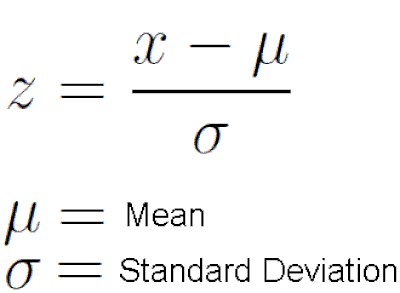


formula for Standardscaler
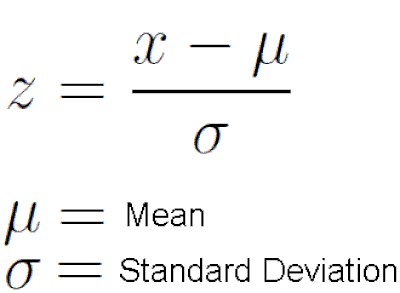



In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Dimension  Reduction

Here We use LDA, PCA and KernalPCA !                                                                                       
this three are the dimension  reductionality algos                                                                              
1.LDA will separate the classes and is used in supervised learning                                                          
2.PCA will gain best information from the data and will give new column with best data it is Unsupervised learning             
3.kernalPCA is the another trick for the Non linear data were we use the Kernels Like rbf, linear , poly, Guassian etc;

links
--->> https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e   
--->> https://scikit-learn.org/stable/modules/lda_qda.html                                                                 
PCA -->>https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html                                 
LDA -->>http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html         
KPCA -->>https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html                             

In [8]:
pass 

#Linear Discriminent Analysis

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda = LDA()
#X_train = lda.fit_transform(X_train)
#X_test = lda.transform(X_test)

"""
Principle Componenet analysis
 
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA()
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
"""
pass

# Tuning

Tuning is the one of the best technique used to reducs the regularization and will improve the performance of the Model
Types of Tuning :-
1. Manual search                                                                                                               
-->>we will search by randomly with out using any function by manualy changing the parameters in model                         
-->>It take more time and more difficult to change the data points                                                                                                                   
2. GridSearch                                                                                                               
-->>This search is used to choice the parameters in grid ways                                                                   
-->>This to will take more time but not difficult to implement                                                                                                                 
3. Randomized Search                                                                                                       
-->>This will check for best parameters randomly                                                                        
-->>this is faster than the above both techniques                                                                           
 
GridSearchCV Link                                                                                                                    
-->> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html                             
-->> https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models                                

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1, 2],
    'random_state' : [0, 10]
}

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
#dtc.fit(X_train, y_train)

In [11]:
#This is the gridSearch Funcion in the algo
grid_search = GridSearchCV(estimator=dtc, 
                          param_grid=parameters,
                          n_jobs=-1,
                          cv=5)

In [12]:
grid_search.fit(X_train, y_train)
grid_search.best_score_


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9915254237288136

In [13]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
y_pred = grid_search.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, grid_search.predict(X_train))

1.0

# HERE I ONLY HIGHLIGHTED TUNING, DIMENSION REDUCTIONALITY, Normalizing

Thanks !